# Imports

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image as im
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
img1 = cv2.imread("img.png")
img2 = cv2.imread("branco.png")
img3 = cv2.imread("preto.png")
img4 = cv2.imread("branco.png") #sem cair meteoro
altura1, largura1, canais1 = img1.shape
altura2, largura2, canais2 = img2.shape
altura3, largura3, canais3 = img3.shape
altura4, largura4, canais4 = img4.shape


In [ ]:
contBranco = 0
contRed = 0

for y in range(0 , altura1):
  for x in range(0 , largura1):
    if img1.item(y,x,0) == 255 and img1.item(y,x,1) == 255 and img1.item(y,x,2) == 255:
      contBranco+=1
    elif  img1.item(y,x,0) == 0  and img1.item(y,x,1) == 0 and img1.item(y,x,2) == 255:
      contRed+=1
      

print("Total de estrelas: ", contBranco)
print("Total de meteoros: ", contRed)

Total de estrelas:  315
Total de meteoros:  328


# Descobrir pixel do nível do mar

In [ ]:
for y in range(0 , altura1):
  for x in range(0 , largura1):
    if img1.item(y,x,0) == 255 and img1.item(y,x,1) == 0 and img1.item(y,x,2) == 0:
      print("Nível do mar:",y)
      break
      


Nível do mar: 512
Nível do mar: 513
Nível do mar: 514
Nível do mar: 515
Nível do mar: 516
Nível do mar: 517
Nível do mar: 518
Nível do mar: 519
Nível do mar: 520
Nível do mar: 521
Nível do mar: 522
Nível do mar: 523
Nível do mar: 524
Nível do mar: 525
Nível do mar: 526
Nível do mar: 527


# Confirmar que cortei a imagem corretamente

Tem água! Camada:  512


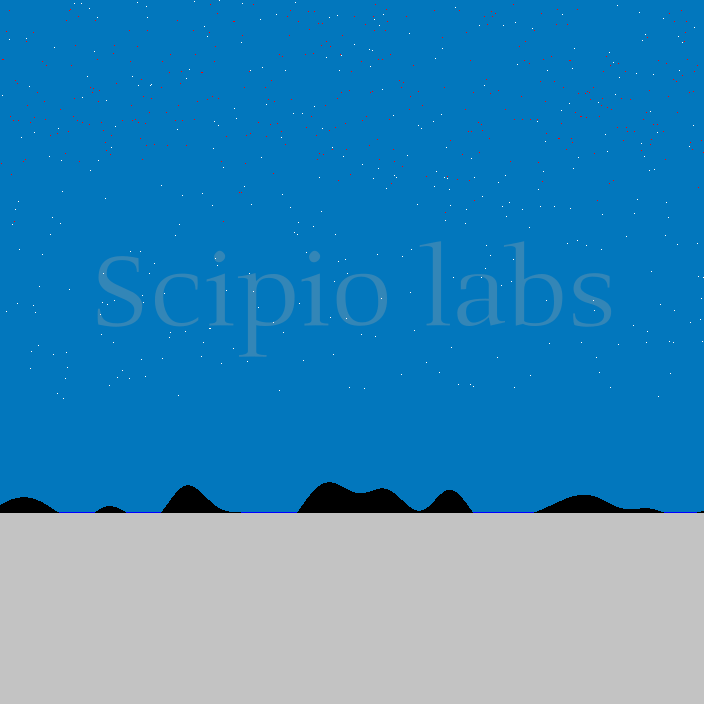

In [ ]:
nm = 512
for y in range(0 , nm+1):
  for x in range(0 , largura1):
    img2.itemset((y, x, 0), img1.item(y,x,0))
    img2.itemset((y, x, 1), img1.item(y,x,1))
    img2.itemset((y, x, 2), img1.item(y,x,2))

for y in range(0 , altura2):
  for x in range(0 , largura2):
    if img2.item(y,x,0) == 255 and img2.item(y,x,1) == 0 and img2.item(y,x,2) == 0:
      print("Tem água! Camada: ", y)
      break

cv2_imshow(img2)

# Destruindo as montanhas

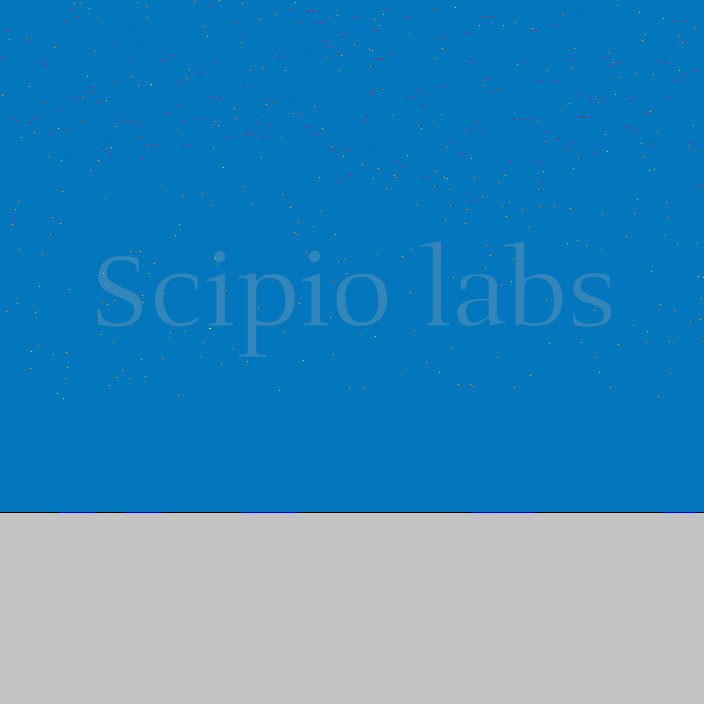

In [ ]:

for y in range(0 , nm):
  for x in range(0 , largura2):
    if img2.item(y,x,0) == 0 and img2.item(y,x,1) == 0 and img2.item(y,x,2) == 0:
      img2.itemset((y, x, 0), 189)
      img2.itemset((y, x, 1), 119)
      img2.itemset((y, x, 2), 2)


cv2_imshow(img2)

# Contar meteoros que vão cair na água

In [ ]:
contFallingRed = 0
for y in range(0 , altura2):
  for x in range(0 , largura2):
    if img2.item(y,x,0) == 0 and img2.item(y,x,1) == 0 and img2.item(y,x,2) == 255 and img2.item(nm,x,0) == 255 and img2.item(nm,x,1) == 0 and img2.item(nm,x,2) == 0:
      contFallingRed+=1

print("Meteoros caindo na água:", contFallingRed)

Meteoros caindo na água: 105


# Resultados

*   Número de estrelas: 315
*   Número de meteoros: 328
*   Meteoros que vão cair na água: 105







# Procurando a frase escondida:

Imagem com todos meteoros

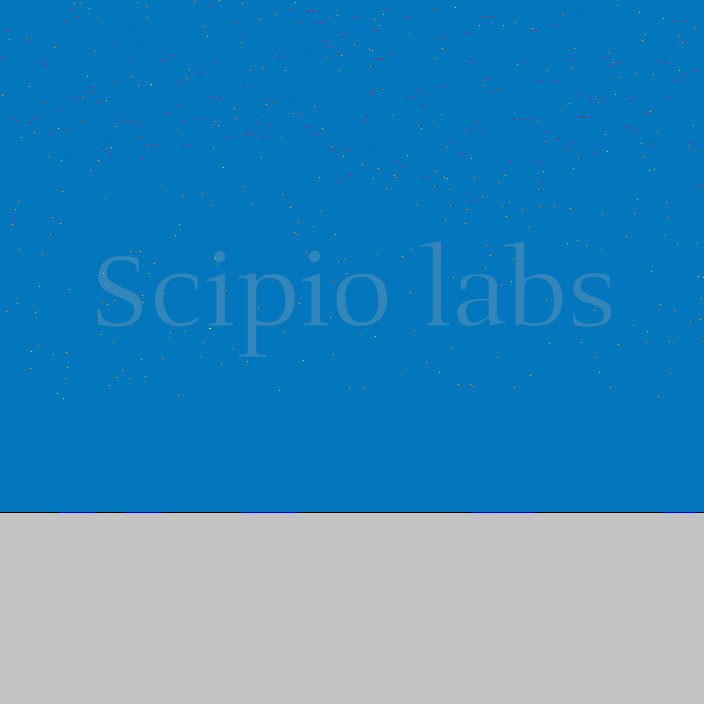

In [ ]:
for y in range(0 , altura2):
  for x in range(0 , largura2):
    img4.itemset((y, x, 0), img2.item(y,x,0))
    img4.itemset((y, x, 1), img2.item(y,x,1))
    img4.itemset((y, x, 2), img2.item(y,x,2))

cv2_imshow(img4)

# Derrubar os meteoros na água (para possíveis testes)

Imagem sem todos meteoros

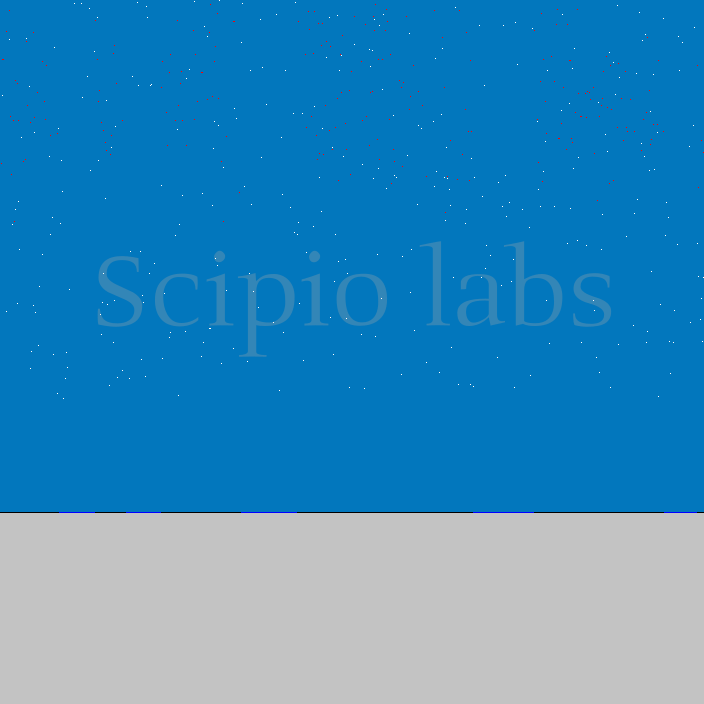

In [ ]:
for y in range(0 , altura2):
  for x in range(0 , largura2):
    if img2.item(y,x,0) == 0 and img2.item(y,x,1) == 0 and img2.item(y,x,2) == 255 and img2.item(nm,x,0) == 255 and img2.item(nm,x,1) == 0 and img2.item(nm,x,2) == 0:
      img2.itemset((y,x,0), 189)
      img2.itemset((y,x,1), 119)
      img2.itemset((y,x,2), 2)
      
      

cv2_imshow(img2)

In [ ]:
contBranco2 = 0
contRed2 = 0
for y in range(0 , altura2):
  for x in range(0 , largura2):
    if img2.item(y,x,0) == 255 and img2.item(y,x,1) == 255 and img2.item(y,x,2) == 255:
      contBranco2+=1
    elif  img2.item(y,x,0) == 0  and img2.item(y,x,1) == 0 and img2.item(y,x,2) == 255:
      contRed2+=1
    
print("Total de estrelas: ", contBranco2)
print("Total de meteoros: ", contRed2)
print("Total:", contBranco2+contRed2)

Total de estrelas:  315
Total de meteoros:  223
Total: 538


# Eliminar "Scipio labs" para organizar melhor os pixels da imagem e ter informação de suas cores

In [ ]:
for y in range(0 , altura2):
  for x in range(0 , largura2):
    if img2.item(y,x,0) != 255 and img2.item(y,x,1) != 255 and img2.item(y,x,2) != 255:
      if img2.item(y,x,0) != 0 and img2.item(y,x,1) != 0 and img2.item(y,x,2) != 255:
        if img2.item(y,x,0) != 0 and img2.item(y,x,1) != 0 and img2.item(y,x,2) != 0:
          if img2.item(y,x,0) != 255 and img2.item(y,x,1) != 0 and img2.item(y,x,2) != 0:
            if img2.item(y,x,0) != 195 and img2.item(y,x,1) != 195 and img2.item(y,x,2) != 195:
              img2.itemset((y,x,0), 189)
              img2.itemset((y,x,1), 119)
              img2.itemset((y,x,2), 2)

Juntar todos os pontos em uma única linha



550
538


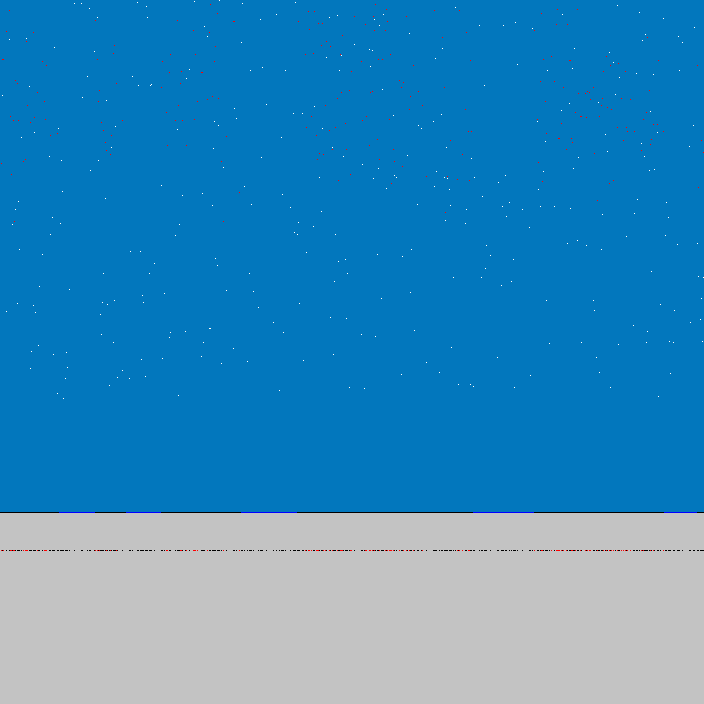

In [ ]:
aux1 = 550
plotou = 0
for y in range(0 , altura2):
  for x in range(0 , largura2):
    if (img2.item(y,x,0) == 255 and img2.item(y,x,1) == 255 and img2.item(y,x,2) == 255) or (img2.item(y,x,0) == 0 and img2.item(y,x,1) == 0 and img2.item(y,x,2) == 255):
        if (img2.item(y,x,0) == 255 and img2.item(y,x,1) == 255 and img2.item(y,x,2) == 255) and (img2.item(aux1,x,0) != 1 and img2.item(aux1,x,1) != 1 and img2.item(aux1,x,2) != 1):
          img2.itemset((aux1,x,0), 1)
          img2.itemset((aux1,x,1), 1)
          img2.itemset((aux1,x,2), 1)
          plotou+=1
        elif (img2.item(y,x,0) == 0 and img2.item(y,x,1) == 0 and img2.item(y,x,2) == 255) and (img2.item(aux1,x,0) != 0 and img2.item(aux1,x,1) != 0 and img2.item(aux1,x,2) != 254):
          img2.itemset((aux1,x,0), 0)
          img2.itemset((aux1,x,1), 0)
          img2.itemset((aux1,x,2), 254)
          plotou+=1
        elif (img2.item(y,x,0) == 255 and img2.item(y,x,1) == 255 and img2.item(y,x,2) == 255) and (img2.item(aux1,x,0) == 1 and img2.item(aux1,x,1) == 1 and img2.item(aux1,x,2) == 1):
          aux1+=1
          img2.itemset((aux1,x,0), 1)
          img2.itemset((aux1,x,1), 1)
          img2.itemset((aux1,x,2), 1)
          
        elif (img2.item(y,x,0) == 0 and img2.item(y,x,1) == 0 and img2.item(y,x,2) == 255) and (img2.item(aux1,x,0) == 0 and img2.item(aux1,x,1) == 0 and img2.item(aux1,x,2) == 254):
          aux1+=1
          img2.itemset((aux1,x,0), 0)
          img2.itemset((aux1,x,1), 0)
          img2.itemset((aux1,x,2), 254)
          
print(aux1)
print(plotou)
cv2_imshow(img2)


In [1]:
frase = []
for y in range(0, altura2):
  for x in range(0 , largura2):
    if (img2.item(y,x,0) == 255 and img2.item(y,x,1) == 255 and img2.item(y,x,2) == 255) :
      frase.append("1")
    elif (img2.item(y,x,0) == 0 and img2.item(y,x,1) == 0 and img2.item(y,x,2) == 255):
      frase.append("0")


string = ''.join(frase)
print(string)


NameError: ignored